In [1]:
from PIL import Image
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [2]:
tmp = np.loadtxt("data/legend.csv", dtype=np.str, delimiter=",")
data = tmp[1:,1].astype(np.str)#加载数据部分
label = tmp[1:,-1].astype(np.str)#加载类别标签部分

imageList=[]
for i in range(13690):
    #str='/Users/shao/Desktop/facial_expressions-master/images/'+data[i]
    for filename in os.listdir(r"images/"):
        if filename==data[i]:
            im = Image.open('images/'+filename)
            im=im.resize((30,30))
            iml = im.convert('L')
            im_array = np.array(iml)            
            im_array=np.reshape(im_array,(900,))   
            
            if label[i].lower()=='anger': label[i]=0
            if label[i].lower()=='surprise': label[i]=1
            if label[i].lower()=='disgust': label[i]=2
            if label[i].lower()=='fear': label[i]=3
            if label[i].lower()=='neutral': label[i]=4
            if label[i].lower()=='happiness': label[i]=5  
            
            im_array=np.append(im_array,label[i])
            imageList.append(im_array)
        
print("finished")

OSError: /Users/shao/Desktop/facial_expressions-master/data/legend.csv not found.

In [2]:
imageList=np.array(imageList)
np.savetxt('/Users/shao/Desktop/facial_expressions-master/imageTxt/wholeFaces.txt',imageList,fmt="%s")
X=np.genfromtxt("/Users/shao/Desktop/facial_expressions-master/imageTxt/wholeFaces.txt",delimiter=None)

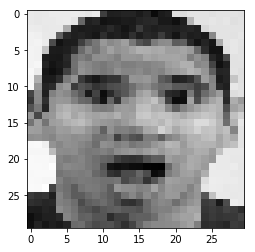

In [3]:
imagePart=X[:,:-1]
tagPart=X[:,-1]
image1=imagePart[0]
img = np.reshape(image1,(30,30)) # convert vectorized data to 24x24 image patches
plt.imshow( img , cmap="gray")

This is the first process of the raw images, in order to resize the images and combine the tags with the images;